# **Q1**

Refer to the following link: https://www.kaggle.com/code/strakul5/principal-component-analysis-of-pokemon-data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
df.shape

(800, 13)

In [3]:
cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [4]:
new_df = df[cols]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(new_df)
t_df = scaler.transform(new_df)
# print(t_df[:5])

pca = PCA(n_components=0.8).fit(t_df)
pval = pd.DataFrame(pca.transform(t_df))
pval.columns = ['PC'+str(i+1) for i in range(len(pval.columns))]
# = pd.DataFrame(pca.transform(t_df), columns = cols)
loading = pd.DataFrame(pca.components_, columns = cols)

In [6]:
pval.head()

,PC1,PC2,PC3,PC4
0,-1.840088,-0.025494,0.665107,0.169980
1,-0.443543,-0.050760,0.668752,0.264308
2,1.480309,-0.058428,0.627574,0.339387
3,3.060557,0.711939,0.998631,-0.183487
4,-2.045946,-0.711499,0.407573,-0.283886


C:\Users\prati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


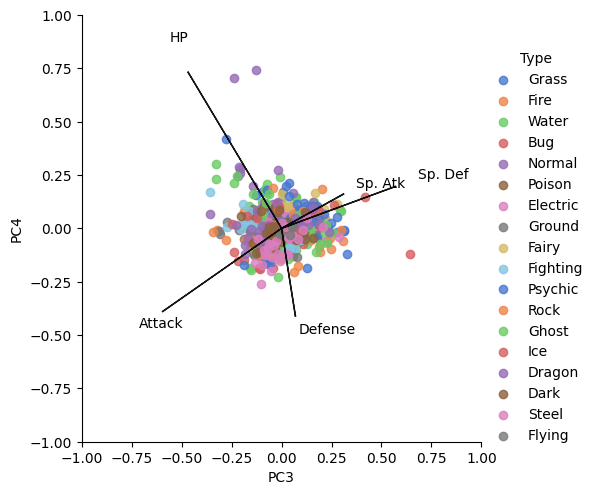

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

pval_t = pval.copy()
pval_t['Type'] = df['Type 1']
xscale = 1 / (pval_t.iloc[:, 2].max() - pval_t.iloc[:, 2].min())
yscale = 1 / (pval_t.iloc[:, 3].max() - pval_t.iloc[:, 3].min())
pval_t.iloc[:, 2] *= xscale
pval_t.iloc[:, 3] *= yscale
lis = list(loading.columns)
g = sns.lmplot(data=pval_t, x = 'PC3', y = 'PC4', hue = 'Type', fit_reg = False, palette='muted')
for i in range(loading.shape[1]):
    lent = math.sqrt(loading.iloc[2, i] ** 2 + loading.iloc[3, i] ** 2)
    if lent >= 0.3:
        plt.arrow(0, 0, loading.iloc[2, i], loading.iloc[3, i], alpha = 0.9)
        plt.text(loading.iloc[2, i]*1.2, loading.iloc[3, i]*1.2, lis[i])
    g.set(ylim=(-1,1))
    g.set(xlim=(-1,1))

C:\Users\prati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

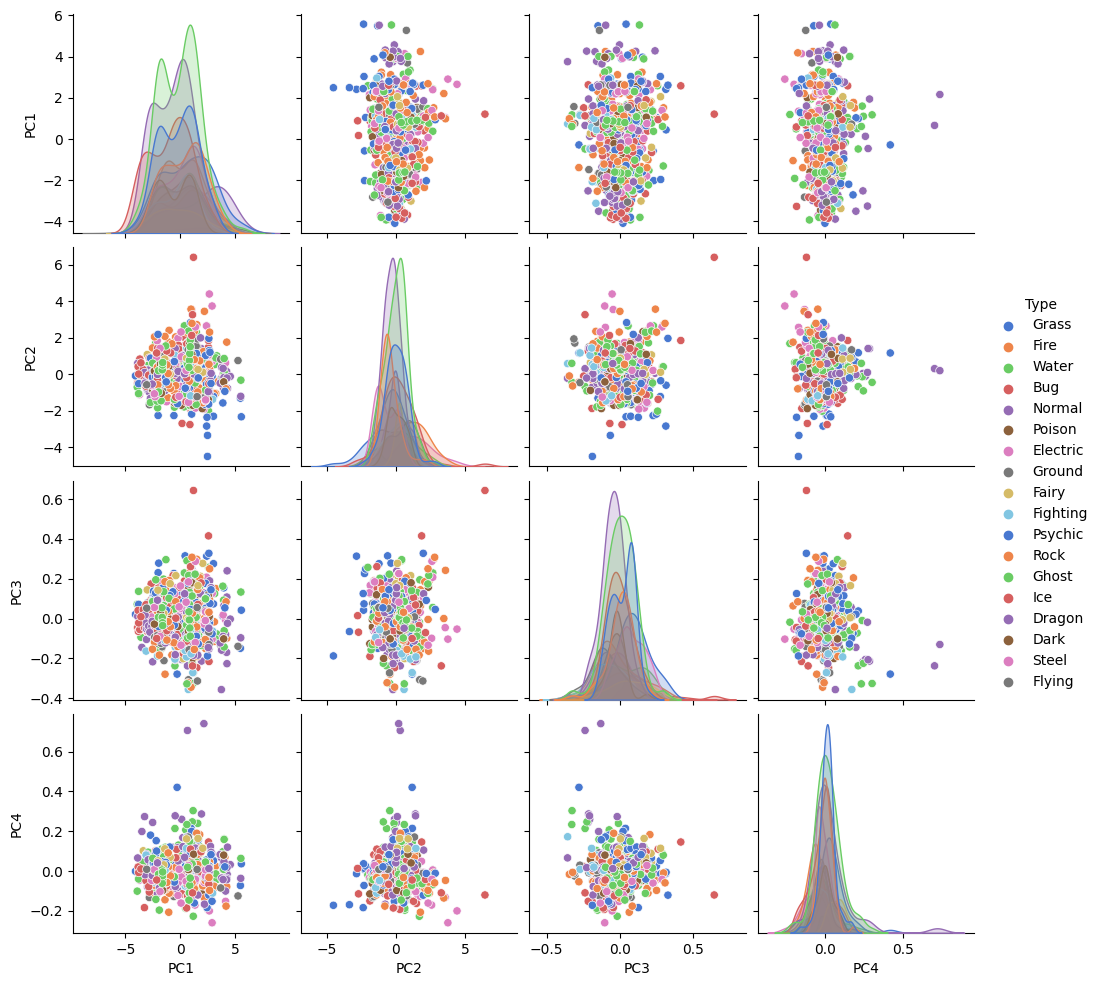

In [8]:
sns.pairplot(pval_t, hue = 'Type', palette = 'muted')

# **Q2**

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.shape

(200000, 9)

In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [ ]:
import math

def calculate_distance(row):
    lat1 = row['pickup_latitude']
    lon1 = row['pickup_longitude']
    lat2 = row['dropoff_latitude']
    lon2 = row['dropoff_longitude']

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Earth's radius in kilometers

    return distance

df['distance'] = df.apply(calculate_distance, axis=1)

In [13]:
import datetime as dt
df['pickup_time'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_time'].dt.hour

In [14]:
df.drop(columns = ['Unnamed: 0', 'key', 'pickup_datetime', 'pickup_time', 'dropoff_longitude', 'pickup_longitude', 'dropoff_latitude', 'pickup_latitude'], inplace=True)

In [15]:
df.head()

,fare_amount,passenger_count,pickup_hour
0,7.5,1,19
1,7.7,1,20
2,12.9,1,21
3,5.3,3,8
4,16.0,5,17


In [16]:
features = df.drop(columns=['fare_amount'])
y = np.array(df['fare_amount'])

inputMat = np.array(features)

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(inputMat, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(159999, 2)
(159999,)
(40000, 2)
(40000,)


In [20]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

103.96031775929953


In [21]:
cov = features.cov()
cov

,passenger_count,pickup_hour
passenger_count,1.920982,0.119082
pickup_hour,0.119082,42.451809


In [22]:
e_val, e_vec = np.linalg.eig(cov)
print(e_val)
print(e_vec)

[ 1.92063199 42.45215896]
[[-0.99999568 -0.00293802]
 [ 0.00293802 -0.99999568]]


In [23]:
e_indices = np.argsort(e_val)[::-1]
e_val = np.sort(e_val)[::-1]
print(e_indices)

[1 0]


In [24]:
e_vec_sorted = e_vec[:, e_indices]
e_vec_sorted

array([[-0.00293802, -0.99999568],
       [-0.99999568,  0.00293802]])

In [25]:
sequential_variance = []
for i in range(len(e_val)):
    sequential_variance.append((e_val[i]/np.sum(e_val))*100)

print(sequential_variance)

[95.6715997614196, 4.328400238580401]


[95.6715997614196, 100.0]


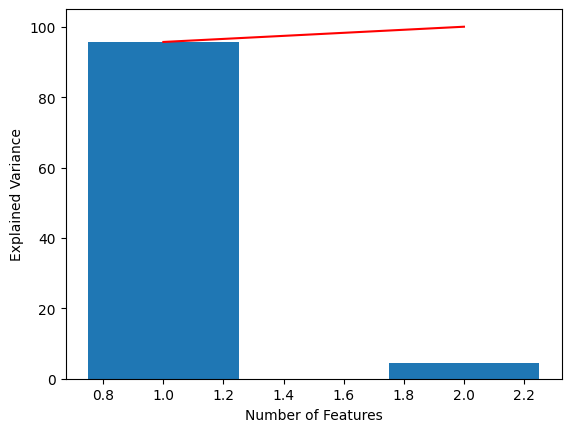

In [26]:
import matplotlib.pyplot as plt
total_v = []
for i in sequential_variance:
    v = i
    if len(total_v) > 0:
        v += total_v[-1]
    total_v.append(v)
print(total_v)
plt.figure()
plt.xlabel("Number of Features")
plt.ylabel("Explained Variance")
plt.bar(range(1, len(sequential_variance) + 1), sequential_variance, width=0.5)
plt.plot(range(1, len(total_v) + 1), total_v, color = 'r')
plt.show()

In [27]:
k = int(input())

In [28]:
top_k = e_vec_sorted[:, :k]
top_k

array([[-0.00293802],
       [-0.99999568]])

In [29]:
inputMat = np.dot(np.array(features), top_k)
inputMat

array([[-1.90028560e+01],
       [-2.00028517e+01],
       [-2.10028474e+01],
       ...,
       [-5.87603497e-03],
       [-1.40028776e+01],
       [-4.00292075e+00]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(inputMat, y, test_size=0.2, random_state=42)

In [31]:
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
print(mse_lr)

103.96031775929953


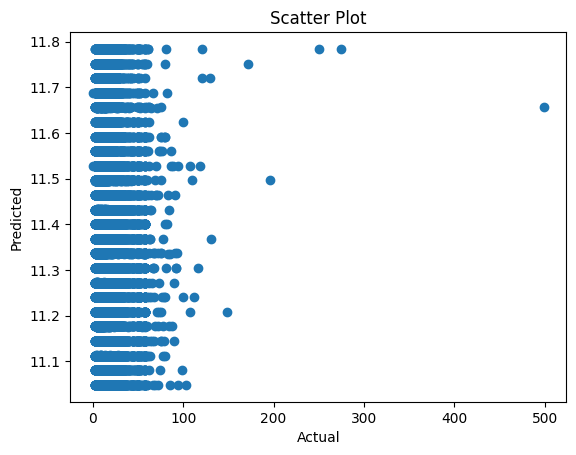

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot')
plt.show()

In [33]:
model_ridge = linear_model.Ridge()
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred)
print(mse_ridge)

103.96031775929953


In [34]:
model_lasso = linear_model.Lasso()
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred)
print(mse_ridge)

103.96031775929953


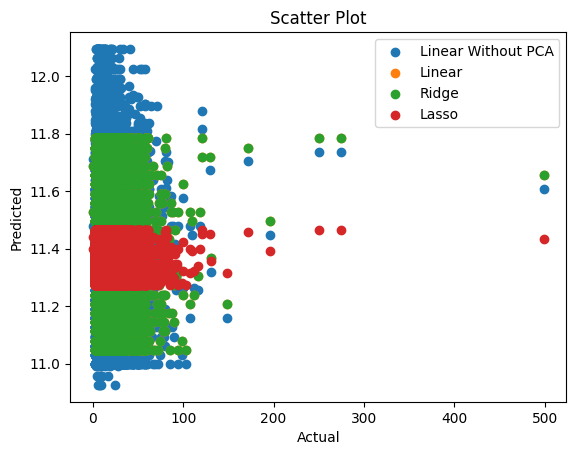

In [35]:
plt.scatter(y_test, y_pred, label = 'Linear Without PCA')
plt.scatter(y_test, y_pred_lr, label = 'Linear')
plt.scatter(y_test, y_pred_ridge, label = 'Ridge')
plt.scatter(y_test, y_pred_lasso, label = 'Lasso')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot')
plt.legend()
plt.show()

# **Q3**

In [36]:
import numpy as np

def kl_divergence(p, q):
    kl = 0
    for i in range(len(p)):
        kl += p[i] * np.log(q[i] / p[i])

    return -kl


p = list(map(float, input().split()))
q = list(map(float, input().split()))
kl = kl_divergence(p, q)
print(kl)

0.13116747939359535


# **Q4**

In [37]:
import pandas as pd

df = pd.read_csv('housing_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [38]:
print(df.shape)

(506, 14)


In [39]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
import numpy as np
import pandas as pd

def linear_regression(X, y):
    """ Simple linear regression using normal equation. """
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

def calculate_mse(X, y, beta):
    """ Calculate Mean Squared Error. """
    y_pred = X @ beta
    mse = np.sum((y - y_pred) ** 2) / len(y)
    return mse

def greedy_forward_selection(X_train, y_train, X_test, y_test):
    selected_features = []
    remaining_features = list(range(X_train.shape[1]))
    best_mse = float('inf')

    while remaining_features:
        best_feature = None
        for feature in remaining_features:
            features_to_use = selected_features + [feature]
            X_train_subset = X_train[:, features_to_use]
            X_test_subset = X_test[:, features_to_use]

            # Add a column of ones for the intercept
            X_train_with_intercept = np.hstack([np.ones((X_train_subset.shape[0], 1)), X_train_subset])
            X_test_with_intercept = np.hstack([np.ones((X_test_subset.shape[0], 1)), X_test_subset])

            beta = linear_regression(X_train_with_intercept, y_train)
            mse = calculate_mse(X_test_with_intercept, y_test, beta)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return selected_features, best_mse

def greedy_backward_selection(X_train, y_train, X_test, y_test):
    selected_features = list(range(X_train.shape[1]))
    best_mse = float('inf')

    while selected_features:
        worst_feature = None
        for feature in selected_features:
            features_to_use = list(selected_features)
            features_to_use.remove(feature)
            X_train_subset = X_train[:, features_to_use]
            X_test_subset = X_test[:, features_to_use]

            # Add a column of ones for the intercept
            X_train_with_intercept = np.hstack([np.ones((X_train_subset.shape[0], 1)), X_train_subset])
            X_test_with_intercept = np.hstack([np.ones((X_test_subset.shape[0], 1)), X_test_subset])

            beta = linear_regression(X_train_with_intercept, y_train)
            mse = calculate_mse(X_test_with_intercept, y_test, beta)

            if mse < best_mse:
                best_mse = mse
                worst_feature = feature

        if worst_feature is not None:
            selected_features.remove(worst_feature)
        else:
            break

    return selected_features, best_mse


file_path = 'housing_data.csv'
housing_data = pd.read_csv(file_path)


X = housing_data.drop('MEDV', axis=1).values
y = housing_data['MEDV'].values

# Standardization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

# Choose which one to use
X_scaled = X_standardized  # or X_min_max_scaled

# Train-Test Split
# Train-Test Split with a random seed for reproducibility
np.random.seed(42)  # Set a random seed
test_size = 0.2  # 20% for testing, 80% for training
n_test = int(len(X_scaled) * test_size)
indices = np.random.permutation(len(X_scaled))
train_indices, test_indices = indices[n_test:], indices[:n_test]

X_train, X_test = X_scaled[train_indices], X_scaled[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


# Run greedy forward selection
forward_selected_features, forward_mse = greedy_forward_selection(X_train, y_train, X_test, y_test)
print('Forward Selection')
print('Selected Features:', forward_selected_features)
print('MSE:', forward_mse)

# Run greedy backward selection
backward_selected_features, backward_mse = greedy_backward_selection(X_train, y_train, X_test, y_test)
print('Backward Selection')
print('Selected Features:', backward_selected_features)
print('MSE:', backward_mse)

# Compare the two
print('Forward Selection MSE:', forward_mse)
print('Backward Selection MSE:', backward_mse)
print('Difference:', backward_mse - forward_mse)


Forward Selection
Selected Features: [12, 10, 8, 9, 2, 4, 7, 1, 6]
MSE: 20.78726197737264
Backward Selection
Selected Features: [1, 4, 6, 7, 8, 9, 10, 12]
MSE: 20.705944803374464
Forward Selection MSE: 20.78726197737264
Backward Selection MSE: 20.705944803374464
Difference: -0.08131717399817617


# **Q5**

In [41]:
import pandas as pd

df = pd.read_csv('housing_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
print(df.shape)

(506, 14)


In [43]:
# Calculate Pearson correlation coefficients
corr_matrix = df.corr(method='pearson').round(4)

# Sort correlations by 'ViolentCrimesPerPop'
sorted_correlations = corr_matrix['MEDV'].sort_values()[::-1][1:]

print(sorted_correlations)

RM         0.6954
ZN         0.3604
B          0.3335
DIS        0.2499
CHAS       0.1753
AGE       -0.3770
RAD       -0.3816
CRIM      -0.3883
NOX       -0.4273
TAX       -0.4685
INDUS     -0.4837
PTRATIO   -0.5078
LSTAT     -0.7377
Name: MEDV, dtype: float64


In [44]:
import numpy as np

k_s = [1,2,3,4,5,6,7,8,9,10,11]
keys = list(sorted_correlations.keys())
best_weights = []
best_features = []
best_mse = float('inf')
for k in k_s:
    columns1 = list(df.columns)
    new_df = df.copy()
    for i in range(k):
        columns1.remove(keys[i])

    # for column in columns:
    new_df.drop(columns = columns1, inplace=True)
    X = np.array(new_df)
    y = np.array(df['MEDV']).reshape(-1, 1)
    X_pseudo = np.linalg.pinv(X)
    weights = X_pseudo @ y
    y_pred = X @ weights
    mse = np.mean((y_pred - y) ** 2)
    if mse < best_mse:
        best_mse = mse
        best_weights = weights
        best_features = new_df.columns

print(best_mse)
print(best_features)
print(len(best_features))

29.382417006536393
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'B'],
      dtype='object')
11


# **Q6**

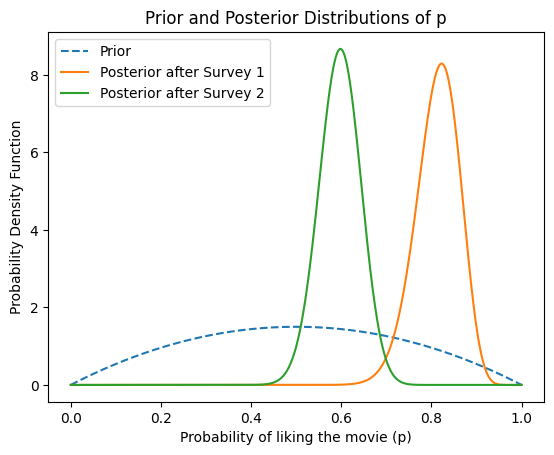

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Parameters for the prior Beta distribution
alpha_prior = 2
beta_prior = 2

# Data from the first survey
successes_survey1 = 50
failures_survey1 = 60 - successes_survey1

# Update parameters for the posterior distribution after the first survey
alpha_posterior1 = alpha_prior + successes_survey1
beta_posterior1 = beta_prior + failures_survey1

# Data from the second survey
successes_survey2 = 16  # 50 - 34
failures_survey2 = 34

# Update parameters for the posterior distribution after the second survey
alpha_posterior2 = alpha_posterior1 + successes_survey2
beta_posterior2 = beta_posterior1 + failures_survey2

# Generate values for the x-axis
x = np.linspace(0, 1, 1000)

# Plot the prior distribution
plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), label='Prior', linestyle='--')

# Plot the posterior distribution after the first survey
plt.plot(x, beta.pdf(x, alpha_posterior1, beta_posterior1), label='Posterior after Survey 1', linestyle='-')

# Plot the posterior distribution after the second survey
plt.plot(x, beta.pdf(x, alpha_posterior2, beta_posterior2), label='Posterior after Survey 2', linestyle='-')

# Add labels and a legend
plt.xlabel('Probability of liking the movie (p)')
plt.ylabel('Probability Density Function')
plt.title('Prior and Posterior Distributions of p')
plt.legend()

# Show the plot
plt.show()


# **Q7**

In [46]:
import numpy as np

def func_without_kernel(x, y):
    return np.dot(np.outer(x, x).flatten(), np.outer(y, y).flatten())
    # fx = np.outer(x, x).flatten()
    # fy = np.outer(y, y).flatten()
    # fx_fy = np.dot(fx, fy)
    # # fx = []
    # # fy = []
    # # fx_fy = 0
    # # for i in range(n):
    # #     for j in range(n):
    # #         fx.append(x[i] * x[j])
    # #         fy.append(y[i] * y[j])
    # #         fx_fy += fx[-1] * fy[-1]
    # return fx_fy

def func_with_kernel(x, y):
    return np.dot(x, y) ** 2
    # xy = np.dot(x, y)
    # # xy = 0
    # # for i in range(n):
    # #     xy += x[i] * y[i]
    # return xy ** 2

n = int(input())
x = list(map(int, input().split()))
y = list(map(int, input().split()))

# fx_fy = func_without_kernel(x, y)
# print(fx_fy)
print(func_without_kernel(x, y))

# k_xy = func_with_kernel(x, y)
# print(k_xy)
print(func_with_kernel(x, y))

1024
1024


# **Q8**

In [47]:
from collections import Counter
import numpy as np

def entropy(arr):
    counter = Counter(arr)
    total = len(arr)
    entropy_val = 0.0
    for value in counter.values():
        probability = value / total
        entropy_val -= probability * np.log2(probability)
    return entropy_val

def joint_entropy(arr1, arr2):
    counter = Counter(zip(arr1, arr2))
    total = len(arr1)
    joint_entropy_val = 0.0
    for value in counter.values():
        probability = value / total
        joint_entropy_val -= probability * np.log2(probability)
    return joint_entropy_val

def mutual_information(X, y):
    mi_list = []
    for col in range(X.shape[1]):
        mi = entropy(X[:, col]) + entropy(y) - joint_entropy(X[:, col], y)
        mi_list.append(mi)
    return mi_list

def feature_selection(X, y, k):
    mi_values = mutual_information(X, y)
    selected_indices = np.argsort(mi_values)[::-1][:k]
    return selected_indices + 1

# Input parsing and function call
n, m, k = map(int, input().split())
X = []
for i in range(n):
    X.append(list(map(int, input().split())))
X = np.array(X)
y = np.array(list(map(int, input().split())))

result = feature_selection(X, y, k)
print(' '.join(map(str, result)))

2 3
